<a href="https://colab.research.google.com/github/filnels/Homeworks/blob/main/Clustering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,  roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import  roc_auc_score

from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay)
import warnings
warnings.filterwarnings('ignore')

In [ ]:

# прочитаем файл
cr_data = pd.read_csv('SouthGermanCredit.asc', sep=r'\s+', engine='python')

print(cr_data.head())


   laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0         1        18      4     2   1049         1        2     4       2   
1         1         9      4     0   2799         1        3     2       3   
2         2        12      2     9    841         2        4     2       2   
3         1        12      4     0   2122         1        3     3       3   
4         1        12      4     0   2171         1        3     4       3   

   buerge  ...  verm  alter  weitkred  wohn  bishkred  beruf  pers  telef  \
0       1  ...     2     21         3     1         1      3     2      1   
1       1  ...     1     36         3     1         2      3     1      1   
2       1  ...     1     23         3     1         1      2     2      1   
3       1  ...     1     39         3     1         2      2     1      1   
4       1  ...     2     38         1     2         2      2     2      1   

   gastarb  kredit  
0        2       1  
1        2       1  
2    

In [ ]:
cr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [ ]:
# Проверка наличия пропущенных значений в каждом столбце
print(cr_data.isnull().sum())

laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
kredit      0
dtype: int64


In [ ]:
# 1000 строк, пропущенных значений нет

In [ ]:
# Выведем количество уникальных значений для каждого столбца
print(cr_data.nunique())

# Выведем уникальные значения каждого столбца
for col in cr_data.columns:
    unique_values = cr_data[col].unique()
    print(f'Уникальные значения в столбце {col}: {unique_values}')

laufkont      4
laufzeit     33
moral         5
verw         10
hoehe       923
sparkont      5
beszeit       5
rate          4
famges        4
buerge        3
wohnzeit      4
verm          4
alter        53
weitkred      3
wohn          3
bishkred      4
beruf         4
pers          2
telef         2
gastarb       2
kredit        2
dtype: int64
Уникальные значения в столбце laufkont: [1 2 4 3]
Уникальные значения в столбце laufzeit: [18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
Уникальные значения в столбце moral: [4 2 3 0 1]
Уникальные значения в столбце verw: [ 2  0  9  3  1 10  5  4  6  8]
Уникальные значения в столбце hoehe: [ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382 

In [ ]:
#мы видим колличественное распределение наших признаков:
#laufkont (status) — статус чекового счета заемщика в банке (категориальный).   [1 2 4 3]
#laufzeit (duration) — срок кредита в месяцах (количественный). от 4 месяцев до 60
#moral (credit_history) — история исполнения заемщиком предыдущих кредитов (категориальный).  [4 2 3 0 1]
#verw (purpose) — цель, для которой нужен кредит (категориальный).  [ 2  0  9  3  1 10  5  4  6  8]
#hoehe (amount) — сумма кредита в немецких марках (количественный).
#sparkont (savings) — сбережения заемщика (категориальный).  [1 2 3 5 4]
#beszeit (employment_duration) — стаж работы заемщика у текущего работодателя (порядковый). [2 3 4 1 5]
#rate (installment_rate) — процент ежемесячного платежа от дохода заемщика (порядковый). [4 2 3 1]
#famges (personal_status_sex) — комбинация пола и семейного положения (категориальный). [2 3 4 1]
#buerge (other_debtors) — есть ли другой должник или поручитель по кредиту (категориальный). [1 3 2]
#wohnzeit (present_residence) — время проживания заемщика по текущему адресу (порядковый). [4 2 3 1]
#verm (property) — самое ценное имущество заемщика (порядковый).  [2 1 3 4]
#alter (age) — возраст заемщика (количественный).
#weitkred (other_installment_plans) — наличие других кредитов, кроме текущего (категориальный). [3 1 2]
#wohn (housing) — тип жилья заемщика (категориальный). [1 2 3]
#bishkred (number_credits) — количество кредитов, имеющихся у заемщика (порядковый). [1 2 3 4]
#beruf (job) — качество работы заемщика (порядковый). [3 2 1 4]
#pers (people_liable) — количество лиц на иждивении заемщика (бинарный). [2 1]
#telef (telephone) — наличие у заемщика стационарного телефона (бинарный).[1 2]
#gastarb (foreign_worker) — является ли заемщик иностранным работником (бинарный).  [2 1]
#kredit (credit_risk) — оценка риска кредита: "хороший" или "плохой" (целевой признак, бинарный). [1 0]

<Axes: >

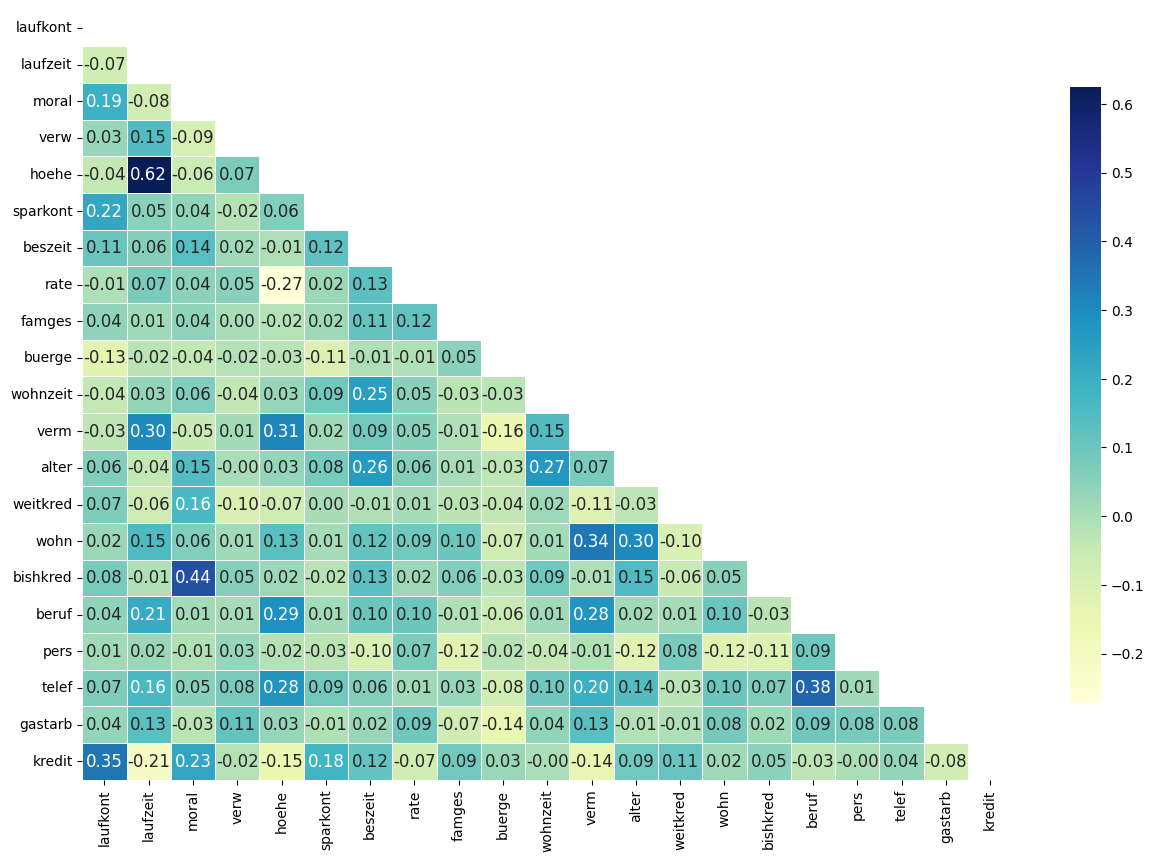

In [ ]:

plt.figure(figsize=(15, 10))
corr_matrix = cr_data.corr()

# Маска для верхнего треугольника
mask = np.triu(corr_matrix)

# Параметры heatmap
sns.heatmap(corr_matrix,
            cmap="YlGnBu",
            annot=True,
            annot_kws={"fontsize": 12},
            mask=mask,
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})


In [ ]:
print(corr_matrix.round(2))

          laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  \
laufkont      1.00     -0.07   0.19  0.03  -0.04      0.22     0.11 -0.01   
laufzeit     -0.07      1.00  -0.08  0.15   0.62      0.05     0.06  0.07   
moral         0.19     -0.08   1.00 -0.09  -0.06      0.04     0.14  0.04   
verw          0.03      0.15  -0.09  1.00   0.07     -0.02     0.02  0.05   
hoehe        -0.04      0.62  -0.06  0.07   1.00      0.06    -0.01 -0.27   
sparkont      0.22      0.05   0.04 -0.02   0.06      1.00     0.12  0.02   
beszeit       0.11      0.06   0.14  0.02  -0.01      0.12     1.00  0.13   
rate         -0.01      0.07   0.04  0.05  -0.27      0.02     0.13  1.00   
famges        0.04      0.01   0.04  0.00  -0.02      0.02     0.11  0.12   
buerge       -0.13     -0.02  -0.04 -0.02  -0.03     -0.11    -0.01 -0.01   
wohnzeit     -0.04      0.03   0.06 -0.04   0.03      0.09     0.25  0.05   
verm         -0.03      0.30  -0.05  0.01   0.31      0.02     0.09  0.05   

In [ ]:
#видим высокая корреляцию между "laufzeit" и "hoehe" - 0.62. Это связано с тем, что продолжительность кредита (laufzeit)
#сильно коррелирует с его суммой (hoehe).
#"verm" и "hoehe"  - 0.31, признак "verm" (цель, для которой нужен кредит) показывает умеренную положительную корреляцию с суммой кредита (hoehe). Это подразумевает, что клиенты с большим количеством активов или залога могут брать большие кредиты.
#"telef" и "beruf" - 0.38, наличие телефона (telef) и профессия клиента (beruf) положительно коррелируют.
#"moral" и "bishkred" - 0.44, хорошо коррелируют, кредитная история и "bishkred" количество предыдущих кредитов, скорее всего
#клиенты с хорошей репутацией чаще имеют кредиты в прошлом.
#"laufkont" и "kredit" - 0.35, признак "laufkont" (статус чекового счета заемщика в банке) имеет относительно высокую корреляцию с
#целевым признаком "kredit", т.е. тип банковского счета влияет на предсказание кредита

#видим отрицательную корреляцию между "laufzeit" и "kredit" - "-0.21" : кредиты с более длительным сроком могут быть связаны с
#более низкой вероятностью выдачи кредита.

#также видим низкие  корреляции(близки к 0) между многими признаками, значит они салабо свяханы между собой.
#поэтому при построении модели лучше испоьзовать нелинейные методы.


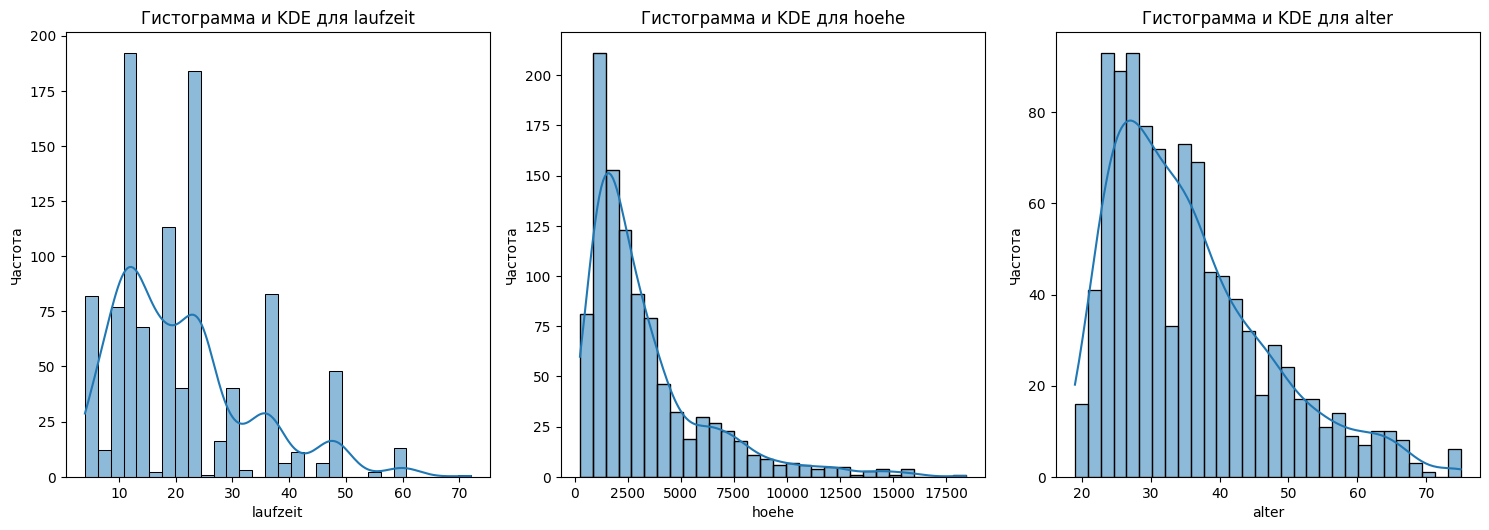

In [ ]:

# посмотрим на распределение количественных признаков
quantitative_features = ['laufzeit', 'hoehe',  'alter']

# Построение гистограмм и KDE-графиков
plt.figure(figsize=(15, 10))
for i, feature in enumerate(quantitative_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(cr_data[feature], kde=True, bins=30)
    plt.title(f'Гистограмма и KDE для {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.tight_layout()
plt.show()



In [ ]:
#laufzeit распределен неравномерно, но больше всего кредитов продолжительностью дл 36 месяцев, величина кредита - нормальное распредеделение с небольшим
#смещенеим вправо, большая часть кредитов с суммой до 3000 тыс, возраст также напоминает нормальное распределение, с возрастным диапазоном от 20 до 50 лет


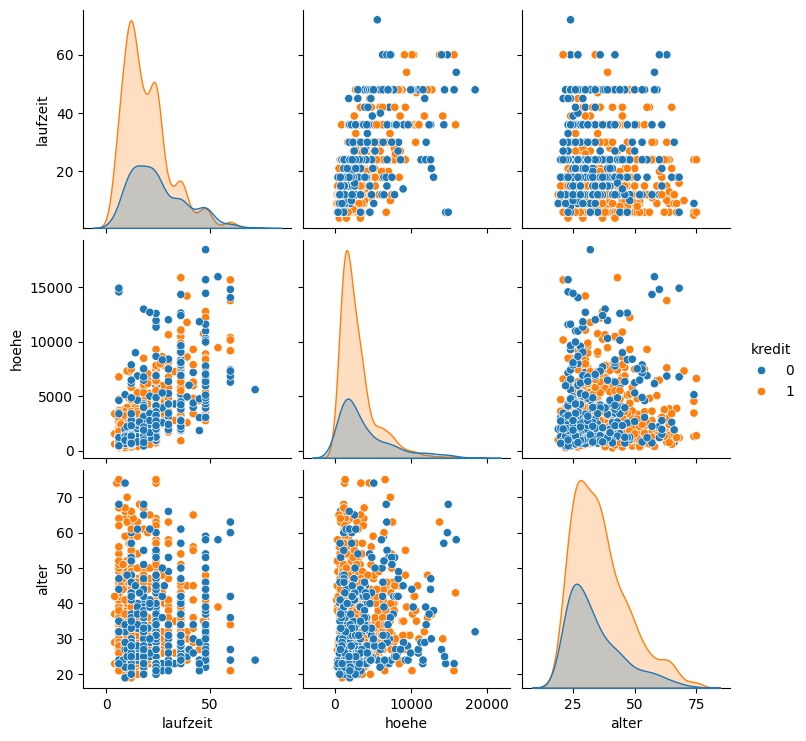

In [ ]:

# построим pairplot для количественных признаков с разделением по целевому признаку 'kredit'
sns.pairplot(cr_data[quantitative_features + ['kredit']], hue="kredit", diag_kind="kde")

plt.savefig('credit', dpi= 200)
plt.show()


In [ ]:
#графики KDE:  laufzeit:  распределение сроков кредита для классов kredit (0 — синий, 1 — оранжевый) различается.
#Для класса 0 график более пологий с максимум в 20 месяцев, в то время как для класса 1  распределение  охватывает более  длинные сроки.
#hoehe: мы видим, что класс 1 больше получает кредиты высокой величины.
#alter: в классе 1  возраст заемщиков намного выше, заметен  пик среди более старших возрастных групп (60–70 лет),
#что может говорить о том, что возраст заемщиков является значимым фактором для выдачи кредита.

#laufzeit и hoehe: положительная корреляция — чем больше сумма кредита, тем больше срок.
#laufzeit и alter: срок кредита имеет слабую зависимость от возраста заемщика. Но, для более старших заемщиков (особенно в возрасте 50–70 лет)
#чаще выдаются кредиты с более короткими сроками для класса 1.
#hoehe и alter: в обеих категориях возраст заемщика не сильно влияет на сумму кредитаэ


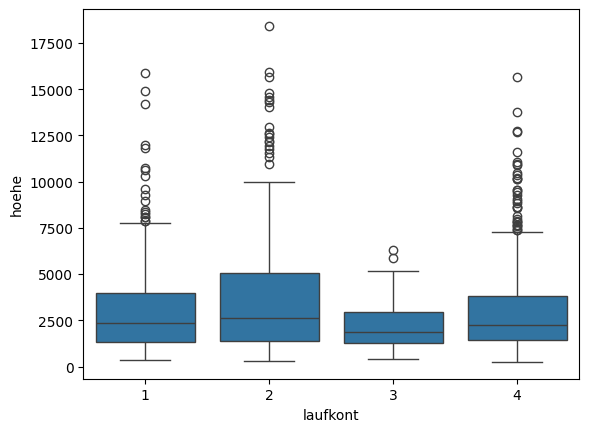

In [ ]:
sns.boxplot(x='laufkont', y='hoehe', data=cr_data)
plt.show()


In [ ]:
# для всех классов медиана приблизительно одинакова: около 2500, но распределение отличается, по сумме выданного кредита у нас лучше класс 2,
#для этого класса 50% получили от 2000 до 5000 кредита. также видим большое количество выбросов для 2 и 4 класса с разбросом от 10000 до 15000 и
#от 7500 до 12 тыс соответственно

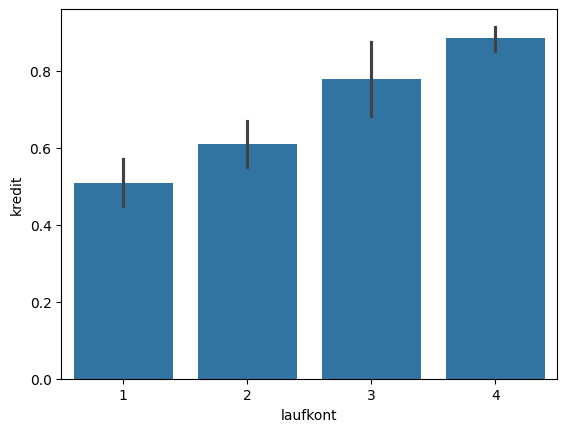

In [ ]:
sns.barplot(x='laufkont', y='kredit', data=cr_data)
plt.show()

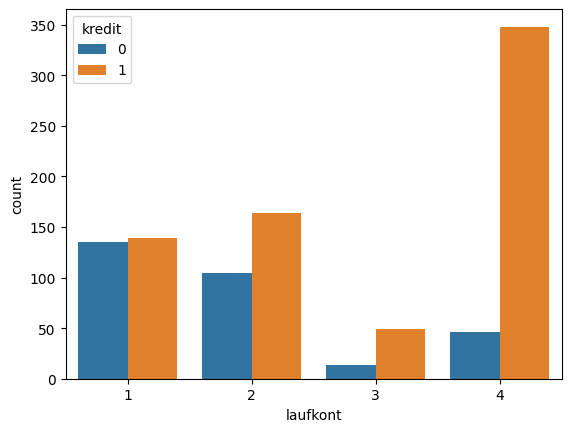

In [ ]:
sns.countplot(x='laufkont', hue='kredit', data=cr_data)
plt.show()


In [ ]:
#видим что статус чекового счета сильно влияет на выдачу кредита, в группе 4 больше всего выданных кредитов, в группе 3-наименьшее количество

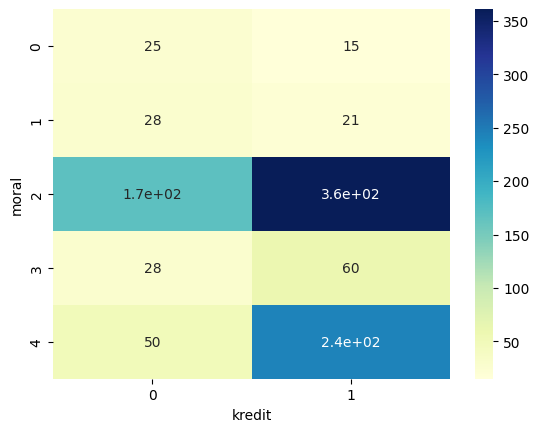

In [ ]:
sns.heatmap(pd.crosstab(cr_data['moral'], cr_data['kredit']), annot=True, cmap="YlGnBu")
plt.show()


In [ ]:
# видим, что больше всего выданных кредитов для класс 2 признака "moral", но также в этом классе и больше всего не выданные, почти половина

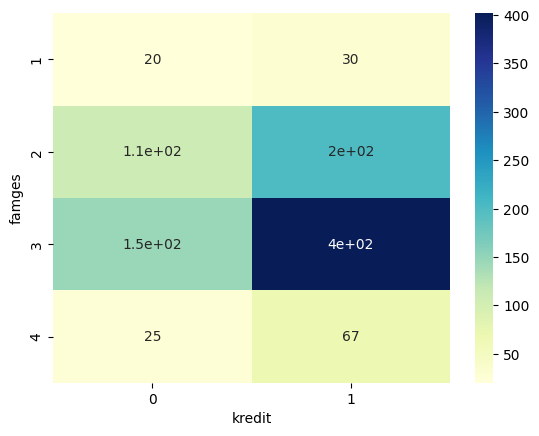

In [ ]:
sns.heatmap(pd.crosstab(cr_data['famges'], cr_data['kredit']), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
#семейное положение оказывается важным признаком,3-класс признака "famges" семейное положения показывают большую вероятность одобрения кредита

In [ ]:
#так как многие наши категориальные признаки, не порядковые, чтоб учитывать важность каждого признака, применим
#One_Hot_Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Применяем OneHotEncoding для категориальных признаков
categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont', 'famges', 'buerge', 'weitkred', 'wohn']
cr_data = pd.get_dummies(cr_data, columns=categorical_columns, drop_first=True)


# Применяем Ordinal Encoding для порядковых признаков
ordinal_columns = ['beszeit', 'rate', 'wohnzeit', 'verm', 'bishkred', 'beruf']
# Инициализируем OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
# Применяем кодирование к порядковым признакам
cr_data[ordinal_columns] = ordinal_encoder.fit_transform(cr_data[ordinal_columns])

# Перевод бинарных признаков из "1" и "2" в 0 и 1
binary_columns = ['pers', 'telef', 'gastarb']

for col in binary_columns:
    cr_data[col] = cr_data[col].apply(lambda x: 1 if x == 2 else 0)




In [ ]:
cr_data.head()

,laufzeit,hoehe,beszeit,rate,wohnzeit,verm,alter,bishkred,beruf,pers,...,sparkont_5,famges_2,famges_3,famges_4,buerge_2,buerge_3,weitkred_2,weitkred_3,wohn_2,wohn_3
0,18,1049,1.0,3.0,3.0,1.0,21,0.0,2.0,1,...,False,True,False,False,False,False,False,True,False,False
1,9,2799,2.0,1.0,1.0,0.0,36,1.0,2.0,0,...,False,False,True,False,False,False,False,True,False,False
2,12,841,3.0,1.0,3.0,0.0,23,0.0,1.0,1,...,False,True,False,False,False,False,False,True,False,False
3,12,2122,2.0,2.0,1.0,0.0,39,1.0,1.0,0,...,False,False,True,False,False,False,False,True,False,False
4,12,2171,2.0,3.0,3.0,1.0,38,1.0,1.0,1,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
# изучим важность наших признаков

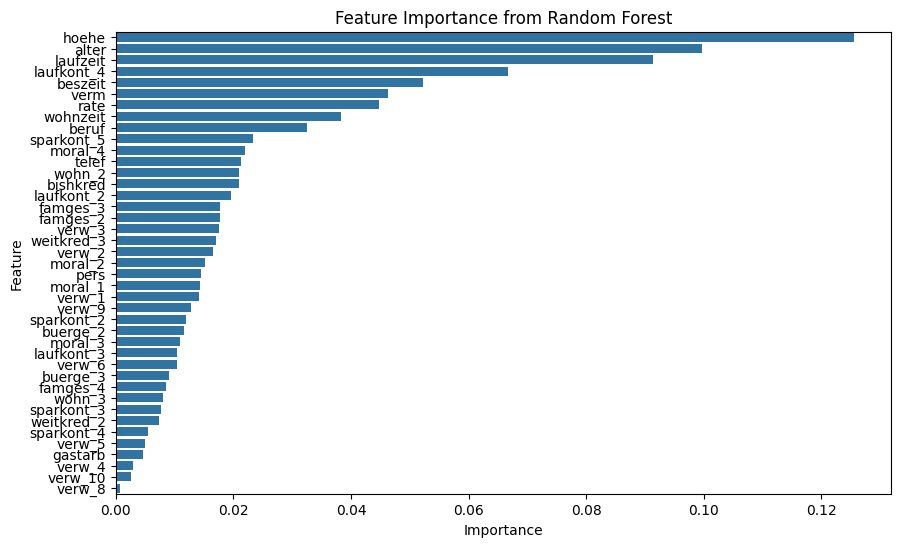

In [ ]:
from sklearn.ensemble import RandomForestClassifier


#  Разделение данных на признаки и целевую переменную
X = cr_data.drop('kredit', axis=1)  # Признаки
y = cr_data['kredit']  # Целевой признак

# Признаки, которые нужно масштабировать
scale_columns = ['laufzeit', 'hoehe', 'alter']

#  Признаки, которые не нужно масштабировать (категориальные и бинарные признаки)
non_scale_columns = [col for col in X.columns if col not in scale_columns]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Масштабируем только количественные признаки в обучающих данных
scaler = StandardScaler()

# Создаём копии
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Применяем масштабирование только к количественным признакам в обучающих данных
X_train_scaled[scale_columns] = scaler.fit_transform(X_train[scale_columns])

# Масштабируем те же признаки в тестовых данных
X_test_scaled[scale_columns] = scaler.transform(X_test[scale_columns])

# Обучение модели Random Forest на масштабированных данных
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

#  Получение важности признаков
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#  Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


In [ ]:
# Создание списка с названиями признаков и их важностью
feature_importance_list = list(zip(X.columns, importances))

# Сортировка по важности (по убыванию)
feature_importance_list = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance_list:
    print(f"Признак: {feature}, Важность: {importance:.4f}")


Признак: hoehe, Важность: 0.1255
Признак: alter, Важность: 0.0996
Признак: laufzeit, Важность: 0.0914
Признак: laufkont_4, Важность: 0.0667
Признак: beszeit, Важность: 0.0522
Признак: verm, Важность: 0.0463
Признак: rate, Важность: 0.0448
Признак: wohnzeit, Важность: 0.0382
Признак: beruf, Важность: 0.0325
Признак: sparkont_5, Важность: 0.0234
Признак: moral_4, Важность: 0.0219
Признак: telef, Важность: 0.0213
Признак: wohn_2, Важность: 0.0209
Признак: bishkred, Важность: 0.0209
Признак: laufkont_2, Важность: 0.0196
Признак: famges_3, Важность: 0.0178
Признак: famges_2, Важность: 0.0177
Признак: verw_3, Важность: 0.0176
Признак: weitkred_3, Важность: 0.0171
Признак: verw_2, Важность: 0.0165
Признак: moral_2, Важность: 0.0151
Признак: pers, Важность: 0.0145
Признак: moral_1, Важность: 0.0143
Признак: verw_1, Важность: 0.0141
Признак: verw_9, Важность: 0.0127
Признак: sparkont_2, Важность: 0.0119
Признак: buerge_2, Важность: 0.0116
Признак: moral_3, Важность: 0.0109
Признак: laufkont_3, 

In [ ]:
#видим как расположены признаки по важности, это нам понадобится при дальнейшей оценке кластеризации

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import pairwise_distances


quant_features = ['laufzeit', 'hoehe', 'alter']  # Количественные признаки для масштабирования
scaler = StandardScaler()
cr_data[quant_features] = scaler.fit_transform(cr_data[quant_features])

# Применяем t-SNE для уменьшения размерности до 2
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(cr_data)

# Функция для вычисления метрики D (среднее расстояние между центроидами кластеров)
def compute_centroid_distances(cluster_centers):
    distances = pairwise_distances(cluster_centers)
    np.fill_diagonal(distances, np.nan)  # Убираем расстояние до себя
    return np.nanmean(distances)  # Среднее расстояние между центроидами кластеров


# Применяем метод k-means для кластеризации
results = []
# Перебираем количество кластеров от 2 до 6
for clusters in range(2, 6):
    kmeans = KMeans(n_clusters=clusters, random_state=42)
    labels = kmeans.fit_predict(data_tsne)
    cluster_centers = kmeans.cluster_centers_

    # Оценка кластеризации с использованием различных метрик
    centroid_distances = compute_centroid_distances(cluster_centers)
    silhouette_avg = silhouette_score(data_tsne, labels)
    davies_bouldin = davies_bouldin_score(data_tsne, labels)
    calinski_harabasz = calinski_harabasz_score(data_tsne, labels)
    homogeneity = homogeneity_score(cr_data['kredit'], labels)
    completeness = completeness_score(cr_data['kredit'], labels)
    v_measure = v_measure_score(cr_data['kredit'], labels)

    # Сохраняем результаты
    results.append({
        'clusters': clusters,
        'Silhouette': silhouette_avg,
        'Davies-Bouldin': davies_bouldin,
        'Calinski-Harabasz': calinski_harabasz,
        'D (Centroid Distances)': centroid_distances,
        'Homogeneity': homogeneity,
        'Completeness': completeness,
        'V-Measure': v_measure
    })

# Преобразуем результаты в DataFrame
results_df = pd.DataFrame(results)
print(results_df)

   clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz  \
0         2    0.391983        1.027136         801.979175   
1         3    0.389437        0.867989         855.686501   
2         4    0.399017        0.787313         964.429077   
3         5    0.374624        0.831386         985.288614   

   D (Centroid Distances)  Homogeneity  Completeness  V-Measure  
0               32.564919     0.000249      0.000220   0.000234  
1               33.106144     0.001643      0.000924   0.001183  
2               33.469517     0.000816      0.000361   0.000501  
3               33.325687     0.020063      0.007620   0.011045  


In [ ]:
#Silhouette Score. это величина, которая позволяет оценить степень соответствия построенной кластерной структуры обучающим данным,
#т.е. оценить качество кластеризации. Иными словами, коэффициент силуэта показывает, насколько каждый объект «похож» на другие объекты
#в том кластере, в который он был распределен в процессе кластеризации, и «не похож» на объекты из других кластеров.
#Этот показатель оценивает, насколько кластеры перекрываются.  Чем меньше значение, тем лучше. у нас значение от 0.37 до 0.39-хороший результат.
#Чем больше кластеров тем, лучше. самый лучшие результат для 3 и 5 кластеров

#Davies-Bouldin. Этот индекс означает среднее “сходство” между кластерами, где сходство - это мера, сравнивающая расстояние между кластерами
#с размером самих кластеров. Ноль - это минимально возможный балл. Значения ближе к нулю указывают на лучшее разделение.
#У нас индекс снижается с увеличением числа кластеров от 1.027136 (для 2 кластеров) до 0.787313 (для 4 кластеров).
#Это показывает улучшение при увеличении количества кластеров до 4, после чего метрика немного ухудшается для 5 кластеров (0.831386).#

#Calinski-Harabasz Score. также известный как критерий коэффициента дисперсии, где более высокий показатель индекса Калински-Харабаского
#относится к модели с более четко определенными кластерами. Индекс представляет собой отношение суммы дисперсии между кластерами и дисперсии
#внутри кластера для всех кластеров (где дисперсия определяется как сумма квадратов расстояний).
#Чем выше этот показатель, тем лучше кластеры отделены друг от друга.
#у нас этот показатель постоянно увеличивается с количеством кластеров — от 801.979175 (для 2 кластеров) до 985.288614 (для 5 кластеров),
#что указывает на улучшение качества кластеризации с увеличением числа кластеров.

#D (Centroid Distances).Расстояние между отдельными кластерами, в идеале должно быть тмаксимальным
#расстояния между центроидами кластеров у нас максимальное для 4 кластеров.

#Homogeneity, Completeness - однородность: каждый кластер содержит только членов одного класса.
#полнота : все члены данного класса относятся к одному кластеру.
#Оба ограничены снизу 0,0 и выше 1,0 (чем выше, тем лучше):-, и V-Measure: Их гармоническое среднее значение.
#Эти показатели оценивают, насколько хорошо целевые метки (в нашем  случае, кредитный риск) распределены по кластерам.
#Значения для 2 и 3 кластеров очень низкие, указывающие на слабую связь между кластерами и метками.
#для 5 кластеров значения немнго возрастают (Homogeneity = 0.020063, Completeness = 0.00762, V-Measure = 0.011045),
#хотя они остаются низкими, что означает, что полученные кластеры плохо отражают целевые метки.

In [ ]:
#попробуем улучшить этот метод, используя метод K-Means++(тогда центроиды будут выбираться не случайным образом) k-means++ — улучшенная версия
#алгоритма кластеризации k-means.
#Суть улучшения заключается в нахождении более «хороших» начальных значений центроидов кластеров

In [ ]:
  # Используем K-Means++
results = []
# Перебираем количество кластеров от 2 до 6
for clusters in range(2, 6):
    kmeans_plus = KMeans(n_clusters=clusters, init='k-means++', random_state=42)
    kmeans_plus.fit(cr_data)
    labels_plus = kmeans_plus.labels_
    cluster_centers = kmeans_plus.cluster_centers_

     # Оценка кластеризации с использованием различных метрик
    #sf_score = compute_sf_score(data_tsne, labels, cluster_centers)
    centroid_distances = compute_centroid_distances(cluster_centers)
    silhouette_avg = silhouette_score(data_tsne, labels)
    davies_bouldin = davies_bouldin_score(data_tsne, labels)
    calinski_harabasz = calinski_harabasz_score(data_tsne, labels)
    homogeneity = homogeneity_score(cr_data['kredit'], labels)
    completeness = completeness_score(cr_data['kredit'], labels)
    v_measure = v_measure_score(cr_data['kredit'], labels)

 # Сохраняем результаты
    results.append({
        'clusters': clusters,
        'Silhouette': silhouette_avg,
        'Davies-Bouldin': davies_bouldin,
        'Calinski-Harabasz': calinski_harabasz,
        'D (Centroid Distances)': centroid_distances,
        'Homogeneity': homogeneity,
        'Completeness': completeness,
        'V-Measure': v_measure
    })


# Преобразуем результаты в DataFrame
results_df = pd.DataFrame(results)
print(results_df)


   clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz  \
0         2    0.374624        0.831386         985.288614   
1         3    0.374624        0.831386         985.288614   
2         4    0.374624        0.831386         985.288614   
3         5    0.374624        0.831386         985.288614   

   D (Centroid Distances)  Homogeneity  Completeness  V-Measure  
0                2.509262     0.020063       0.00762   0.011045  
1                2.886014     0.020063       0.00762   0.011045  
2                3.044613     0.020063       0.00762   0.011045  
3                3.013651     0.020063       0.00762   0.011045  


In [ ]:
#к сожалению результаты практически не улучшились

In [ ]:
#применим Elbow Method for Optimal Clusters

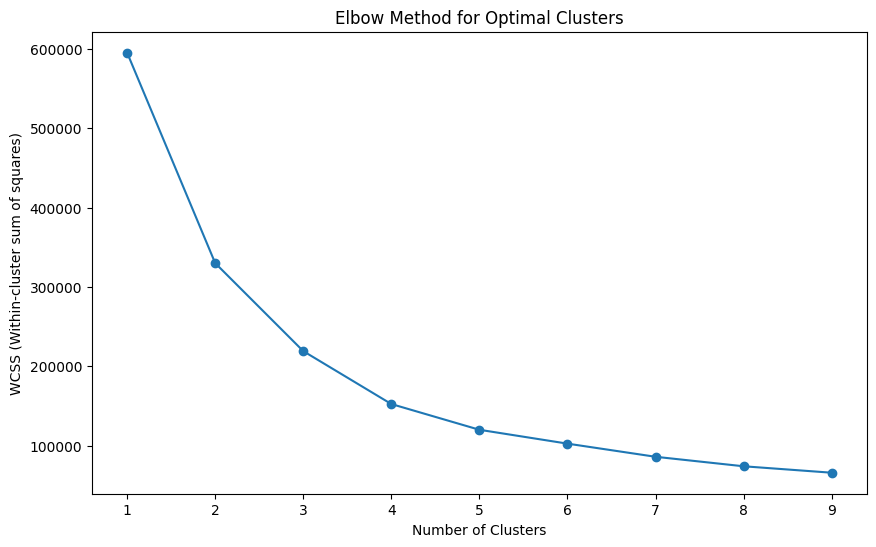

In [ ]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_tsne)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()



In [ ]:
#видим, что функция перестает стремительно убывать, приблизительно для 4 кластеров

In [ ]:
 #методом K-Means: для 4 кластеров (выбрано на основе результатов метрик и метода локтя)

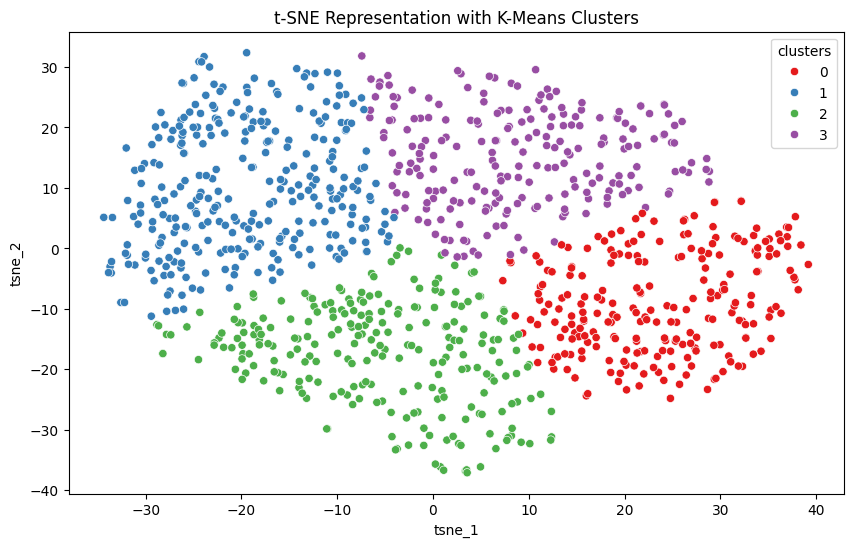

In [ ]:
# Преобразуем данные t-SNE в отдельные столбцы DataFrame
cr_data['tsne_1'] = data_tsne[:, 0]
cr_data['tsne_2'] = data_tsne[:, 1]

# Применяем K-Means с оптимальным количеством кластеров
optimal_clusters = 4  # оптимальное количество кластеров на основе анализа
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cr_data['clusters'] = kmeans.fit_predict(data_tsne)

# Визуализируем результаты с помощью t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='clusters', data=cr_data, palette='Set1')
plt.title('t-SNE Representation with K-Means Clusters')
plt.show()


In [ ]:
#Видим, что кластеры плохо отделены друг от друга, а также не плотно расположены точки внутри кластера. скорее всего
#данный метод не подходит для наших данных, в которых преобладают категориальные признаки

In [ ]:
#попробуем применить алгомеративный метод:

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Применяем агломеративную кластеризацию для кластеризации
results = []
# Перебираем количество кластеров от 2 до 6
for clusters in range(2, 6):
    agglomerative = AgglomerativeClustering(n_clusters=clusters)
    labels = agglomerative.fit_predict(data_tsne)


    # Оценка кластеризации с использованием различных метрик
    silhouette_avg = silhouette_score(data_tsne, labels)
    davies_bouldin = davies_bouldin_score(data_tsne, labels)
    calinski_harabasz = calinski_harabasz_score(data_tsne, labels)
    homogeneity = homogeneity_score(cr_data['kredit'], labels)
    completeness = completeness_score(cr_data['kredit'], labels)
    v_measure = v_measure_score(cr_data['kredit'], labels)

    # Сохраняем результаты
    results.append({
        'clusters': clusters,
        'Silhouette': silhouette_avg,
        'Davies-Bouldin': davies_bouldin,
        'Calinski-Harabasz': calinski_harabasz,
        'Homogeneity': homogeneity,
        'Completeness': completeness,
        'V-Measure': v_measure
    })

# Преобразуем результаты в DataFrame
results_df = pd.DataFrame(results)
print(results_df)

   clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz  Homogeneity  \
0         2    0.385594        1.037209         775.959072     0.000132   
1         3    0.323089        0.968048         671.878105     0.000790   
2         4    0.319328        0.981363         709.226316     0.010560   
3         5    0.328901        0.895681         822.301212     0.022323   

   Completeness  V-Measure  
0      0.000116   0.000124  
1      0.000464   0.000585  
2      0.004730   0.006533  
3      0.008537   0.012351  


In [ ]:
#к сожалению мы также не видим улучшений результатов.

In [ ]:
import hdbscan

# Применяем HDBSCAN для кластеризации
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=2)
labels = hdbscan_model.fit_predict(data_tsne)


# Оценка кластеризации с использованием различных метрик

silhouette_avg = silhouette_score(data_tsne, labels)
davies_bouldin = davies_bouldin_score(data_tsne, labels)
calinski_harabasz = calinski_harabasz_score(data_tsne, labels)
homogeneity = homogeneity_score(cr_data['kredit'], labels)
completeness = completeness_score(cr_data['kredit'], labels)
v_measure = v_measure_score(cr_data['kredit'], labels)

# Сохраняем результаты
results = {
    'Silhouette': silhouette_avg,
    'Davies-Bouldin': davies_bouldin,
    'Calinski-Harabasz': calinski_harabasz,
    'SF (Compactness)': sf_score,
    'Homogeneity': homogeneity,
    'Completeness': completeness,
    'V-Measure': v_measure
}

# Преобразуем результаты в DataFrame
results_df = pd.DataFrame([results])
print(results_df)

   Silhouette  Davies-Bouldin  Calinski-Harabasz  SF (Compactness)  \
0    0.114287        1.402253          22.164603          1.053992   

   Homogeneity  Completeness  V-Measure  
0     0.321952      0.046594   0.081407  


In [ ]:
#результаты оставляют желать лучшего(((((